# Linear Regression in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

## Uni-Variate Linear Regression

We will start by setting up a Uni-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP**    

> Regression Model : Total = $a$ $\times$ HP + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.



We will start with the simplest form of Machine Learning: Uni-Variate Linear Regression

* **Uni-Variate**: One variable. We use only *one* feature to make a prediction.
* **Linear**: We assume that the relationship forms a straight line. 

**The problem**: We want to predict a Pokemon's Total power based on its HP stat. 

* **Response Variable** (*y*): `Total` (What we want to predict)
* **Predictor Feature** (*x*): `HP` (The input data we have)

**The Math**: We are trying to find the best numbers for *a* and *b* in this equation: 

> Total = $a$ $\times$ HP + $b$ 

In [5]:
# Create a DataFrame for the 'Total' column (The target we want to predict)
total = pd.DataFrame(pkmndata['Total'])  # Response

# Create a DataFrame for the 'HP' column (The input we use to predict)
hp = pd.DataFrame(pkmndata['HP'])        # Predictor

To check if our model actually learns, we cannot give it *all* the data

* **Train Set (LAMS)**: The model uses this data to learn the relationship
* **Test Set (Finals)**: We hide this data during training and use it later to check how well the model performs.

Set up the regression problem with Train and Test datasets.   
Train Set with 600 samples and Test Set with 200 samples.

In [6]:
# --- Manual Split ---
# We are taking the first 600 Pokemon for training
hp_train = pd.DataFrame(hp[:600])
total_train = pd.DataFrame(total[:600])

# We are taking the last 200 Pokemon for testing
hp_test = pd.DataFrame(hp[-200:])
total_test = pd.DataFrame(total[-200:])

# Check the sample sizes to ensure the split worked
print("Train Set :", hp_train.shape, total_train.shape)
print("Test Set  :", hp_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [7]:
# Summary Statistics for HP Train
hp_train.describe()

,HP
count,600.000000
mean,69.026667
std,26.611267
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [8]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,432.715000
std,122.365283
min,180.000000
25%,325.000000
50%,440.000000
75%,515.000000
max,780.000000


Before analyzing, we must **see** the data. We use statistics and plots to understand the distributed (spread) of the variables. 

* **Boxplot**: Shows median and outliers
* **Histogram**: Shows the frequency distribution (shape of the data)
* **Violin Plot**: A combination of the two above

<Axes: >

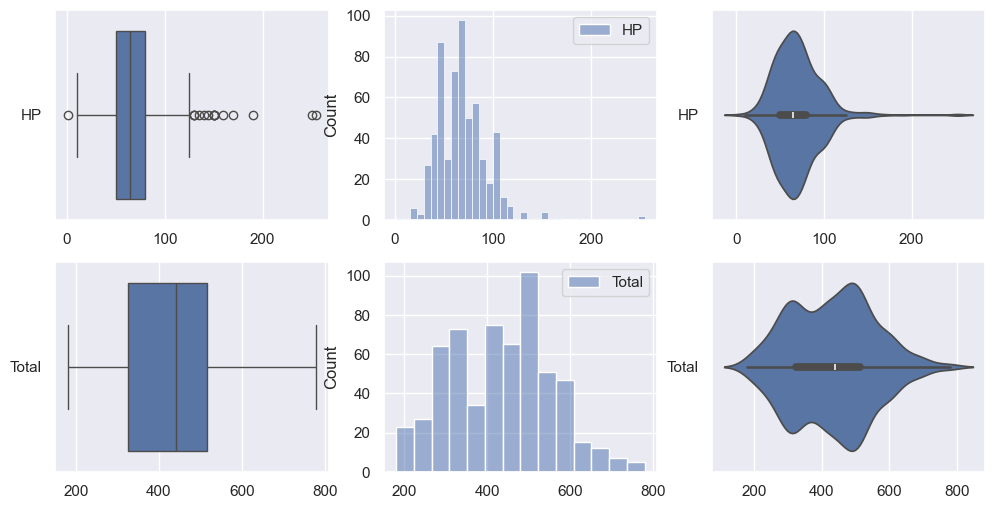

In [9]:
# Set up a large figure with 2 rows and 3 columns for plotting
f, axes = plt.subplots(2, 3, figsize=(12, 6))

# --- Row 1: Visualizing HP (Predictor) ---
sb.boxplot(data = hp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = hp_train, ax = axes[0,1])
sb.violinplot(data = hp_train, orient = "h", ax = axes[0,2])

# --- Row 2: Visualizing Total (Response) ---
sb.boxplot(data = total_train, orient = "h", ax = axes[1,0])
sb.histplot(data = total_train, ax = axes[1,1])
sb.violinplot(data = total_train, orient = "h", ax = axes[1,2])

**Visualizing the Relationship**

We use a **Jointplot** to see how `HP` and `Total` move together. If the points go up from left to right, there is a positive correlation. 

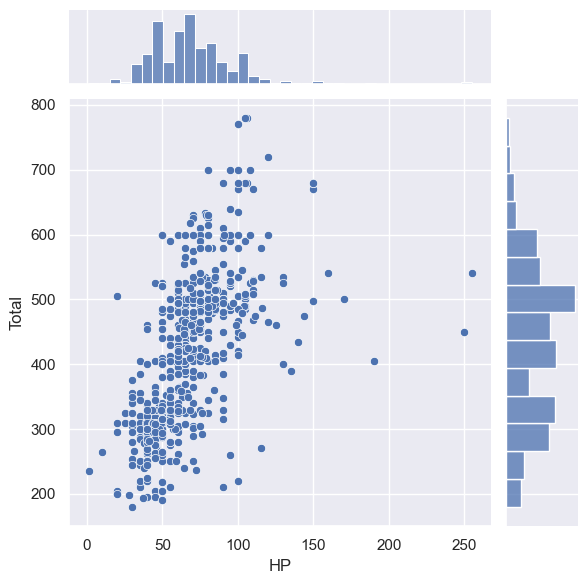

In [10]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "HP", y = "Total", height = 6)

<Axes: >

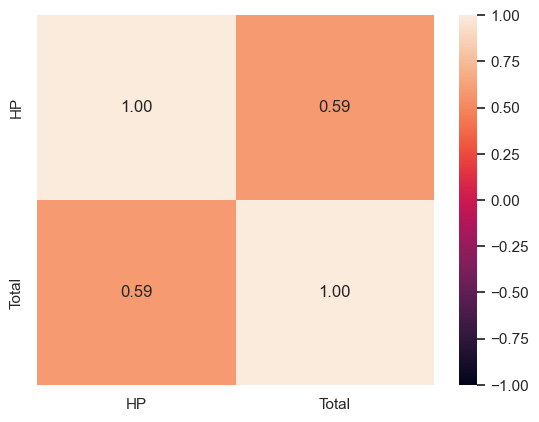

In [11]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [12]:
# Import LinearRegression model from Scikit-Learn
import sklearn as sk
from sklearn.linear_model import LinearRegression

#Print library package version
print("sklearn version = "+sk.__version__)

# Initialize the Linear Regression object (an empty model waiting to learn)
linreg = LinearRegression()

sklearn version = 1.6.1


Train the Linear Regression model `linreg` using the Train Set.   
Use `hp_train` as *Predictor* and `total_train` as *Response*.

This is where the "learning" happens. The `.fit()` command calculates the math to find the best line that fits the dots. 

In [13]:
# Train the model using our Train Set
linreg.fit(hp_train, total_train)

LinearRegression()

You have *trained* the model to fit the following formula.

>  Regression Problem : Total = $a$ $\times$ HP + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [14]:
# Intercept (b): Where the line crosses the Y-axis
print('Intercept \t: b = ', linreg.intercept_)

# Coefficient (a): How much 'Total' increases for every 1 point of 'HP'
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [245.18583183]
Coefficients 	: a =  [[2.71676407]]


Plot the regression line based on the coefficients-intercept form.

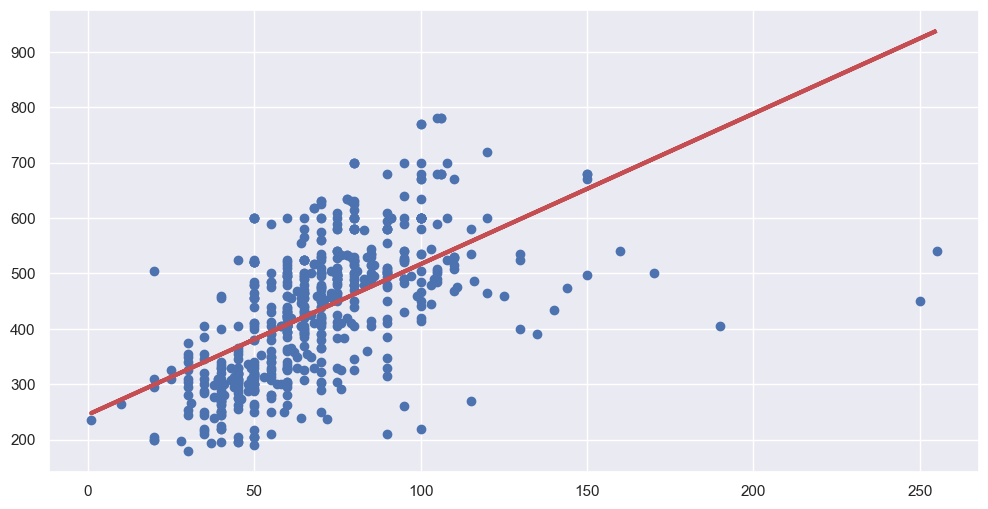

In [15]:
# Calculate the line manually: y = b + a*x
regline_x = hp_train
regline_y = linreg.intercept_ + linreg.coef_ * hp_train

# Plot the original data (dots) and the regression line (red line)
f = plt.figure(figsize=(12, 6))
plt.scatter(hp_train, total_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

Plot the regression line by prediction using the model.

Now that the model is *trained*, we can ask it to predict values.

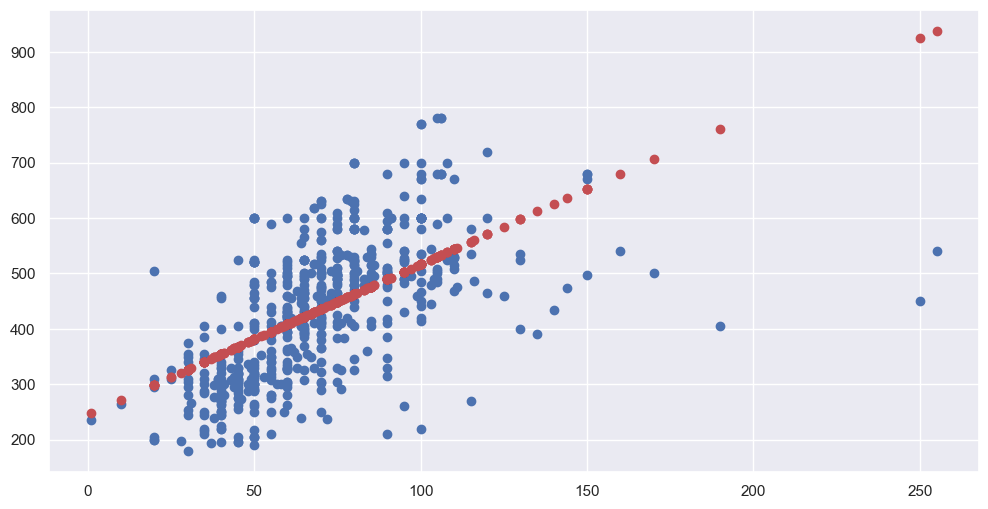

In [16]:
# Ask the model to predict Total for the training data
total_train_pred = linreg.predict(hp_train) # For every "HP" data point in hp_train, what is the corresponding predicted "Total" stat

# Plot: Blue dots are real data, Red dots are the model's predictions
f = plt.figure(figsize=(12, 6))
plt.scatter(hp_train, total_train)
plt.scatter(hp_train, total_train_pred, color = "r")    # Naturally, your predicted points are in a line (best-fit)
plt.show()

#### Goodness of Fit of the Model

How wrong is our model? We use two main metrics:

1. $R^2$ **(Explained Variance)**: A score from 0 to 1. Closer to 1 is better.
2. **MSE (Mean Squared Error)**: The average squared difference between the real value and the predicted value. Lower is better.

---

After the model makes prediction on the **Test Set** or the data it has never seen before (sit for finals), we need to grade it. We use two main *scores*:

1. $R^2$ **(accuracy score)**: How much of the variation in the data did we explain?
2. **MSE (error score)**: On average, how far off were our guesses?

**1. Explained Variance** (R^2)

Think of this as a **Test Score** out of 100% (or 1.0).

* **1.0**: Perfect prediction, the model explains everything
* **0.0**: The model is no better than just guessing the average for everyone
* **Negative**: The model is worse than useless (actively misleading)

**2. Mean Squared Error (MSE)**

Think of this as the **Average Penalty Points**

* **MSE**: We take the error (difference between Truth and Prediction), squared it (to make negatives positive and punish larger mistakes), and then take the average
    * *Note*: The units are squared (e.g., "squared HP"), which may be hard to understand
* **RMSE (Root Mean Squared Error)**: Taking the square root of MSE
    * *Note*: Brings the units back to normal (e.g., "HP"). Tells you, *"On average, my prediction is wrong by **X** points"*

### TLDR
* $R^2$ **is relative**: It tells you how *well* the line fits the shape of the data
* **RMSE is absolute**: It tells you how *many points* you are wrong by on average. 

**Example**: If your RMSE is **40**, and the Total stats range from 100-700, an error of 40 isn't *too bad*. But if your Total stats only ranged from 0-50, an error of 40 is terrible. So, always look at RMSE in the *context* of your own data.

In [17]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(hp_train, total_train))

# Function to calculate Mean Squared Error
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(total_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.34907482643576504
Mean Squared Error (MSE) 	: 9730.229398983363
Root Mean Squared Error (RMSE) 	: 98.64192515854181


Test the Linear Regression model `linreg` using the Test Set.

We trained on the *first 600* Pokemon. Now, we test on the remaining 200 to see if the model generalizes well.

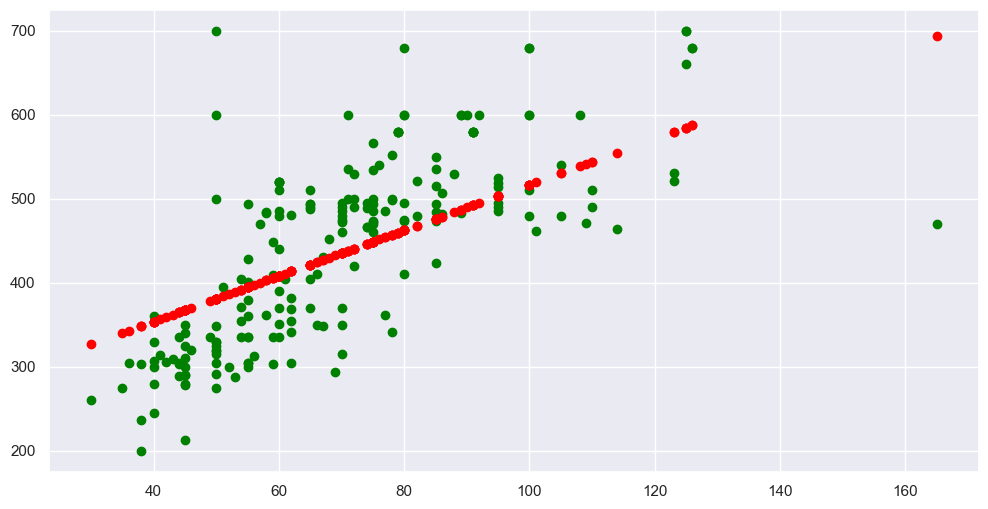

In [18]:
# Predict Total for the TEST set (New data the model hasn't seen)
total_test_pred = linreg.predict(hp_test)

# Plot the real Test data (Green) vs Predictions (Red)
f = plt.figure(figsize=(12, 6))
plt.scatter(hp_test, total_test, color = "green")
plt.scatter(hp_test, total_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    

How wrong is our model? We use two main metrics:

1. $R^2$ **(Explained Variance)**: A score from 0 to 1. Closer to 1 is better.
2. **MSE (Mean Squared Error)**: The average squared difference between the real value and the predicted value. Lower is better.

---

In [19]:
# --- Metric 1: R^2 Score (Accuracy) ---
# The .score() function automatically compares the inputs (hp_test)
# with the true targets (total_test) to calculate accuracy.
# Ideally, we want this number to be as close to 1.0 as possible.
r2_score = linreg.score(hp_test, total_test)
print("Explained Variance (R^2) \t:", r2_score)

# --- Metric 2: Mean Squared Error (The Penalty) ---
def mean_sq_err(actual, predicted):
    '''
    Manual function to calculate MSE.
    Step 1: Subtract Predicted from Actual to get the Error (Residual).
    Step 2: Square the Error (so -5 and +5 both become 25).
    Step 3: Calculate the Mean (average) of these squared errors.
    '''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Calculate MSE using our function
mse = mean_sq_err(total_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

# --- Metric 3: Root Mean Squared Error (The Readable Error) ---
# We take the square root of MSE to get the error in real units.
# If RMSE is 50, it means our prediction is typically off by +/- 50 points.
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Explained Variance (R^2) 	: 0.491431967566469
Mean Squared Error (MSE) 	: 6397.401764721526
Root Mean Squared Error (RMSE) 	: 79.98375938102389


#### Regression with Random Train-Test Split

Split the Train and Test sets randomly, and perform Linear Regression.

Intercept of Regression 	: b =  [241.00223836]
Coefficients of Regression 	: a =  [[2.77245852]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3673804904506236
Mean Squared Error (MSE) 	: 9238.07323457012

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.42316899700235033
Mean Squared Error (MSE) 	: 7831.791988142133



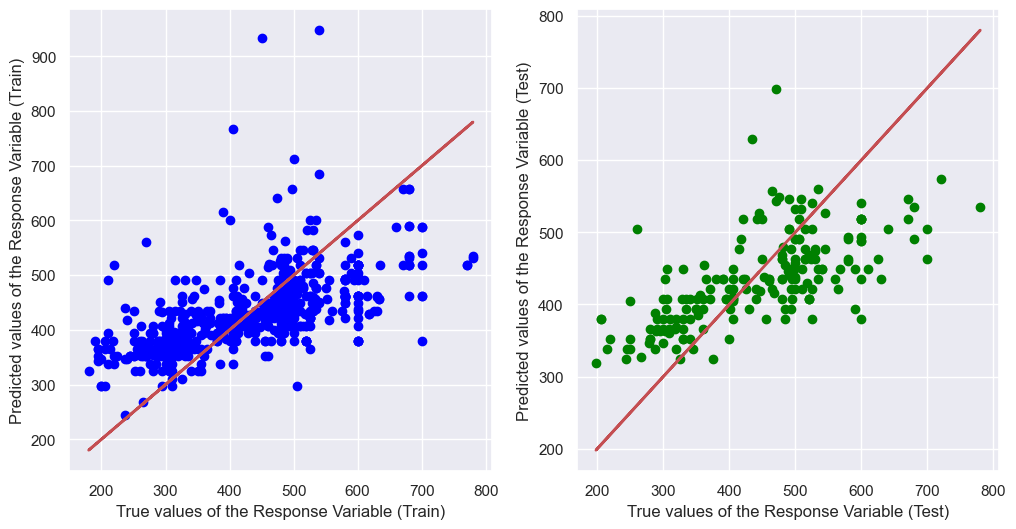

In [20]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
total = pd.DataFrame(pkmndata['Total'])   # Response
hp = pd.DataFrame(pkmndata['HP'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(hp, total, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

---

## Multi-Variate Linear Regression

We will start by setting up a Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

Using just `HP` may not be very accurate. Let's use **more information** to make a better prediction. We will now use **HP, Attack, and Defense** to predict **Total**. 

The **New Math**

> $\mathrm{Total}$ = $\alpha_1 \times (\mathrm{HP})$ + $\alpha_2 \times (\mathrm{Attack})$ + $\alpha_3 \times (\mathrm{Defense})$ + $b$

In [21]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense"]])

Set up the regression problem with Train and Test datasets.

Instead of slicing `[:600]`, we use `train_test_split` to randomly shuffle the data. This is a more scientific best practice.

In [22]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Randomly split 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (600, 1) (600, 3)
Test Set  : (200, 1) (200, 3)


#### Basic Exploration

Perform basic statistical exploration and visualization on the Train Set.

In [23]:
# Summary Statistics for Response
y_train.describe()

,Total
count,600.000000
mean,435.855000
std,118.556485
min,180.000000
25%,330.000000
50%,455.000000
75%,511.250000
max,780.000000


In [24]:
# Summary Statistics for Predictors
X_train.describe()

,HP,Attack,Defense
count,600.000000,600.000000,600.000000
mean,69.951667,80.006667,73.911667
std,25.055051,32.851514,31.048842
min,10.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,68.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


<Axes: >

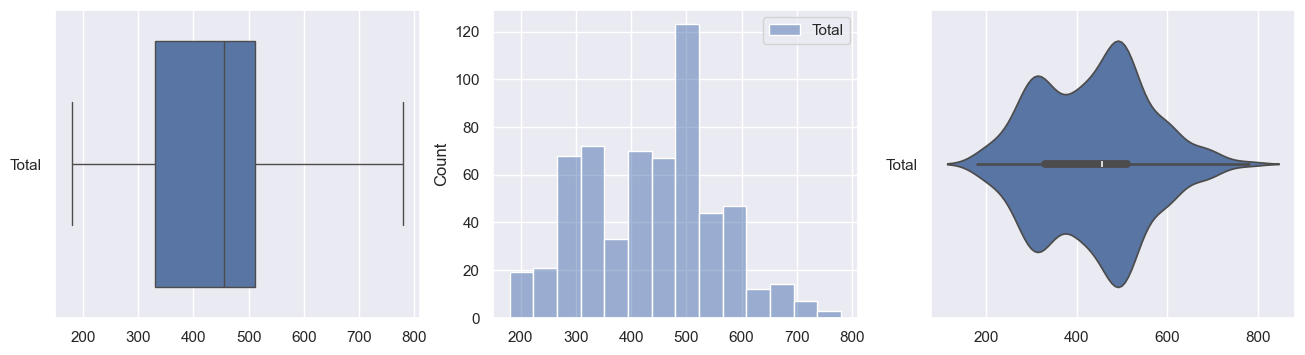

In [25]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(16, 4))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

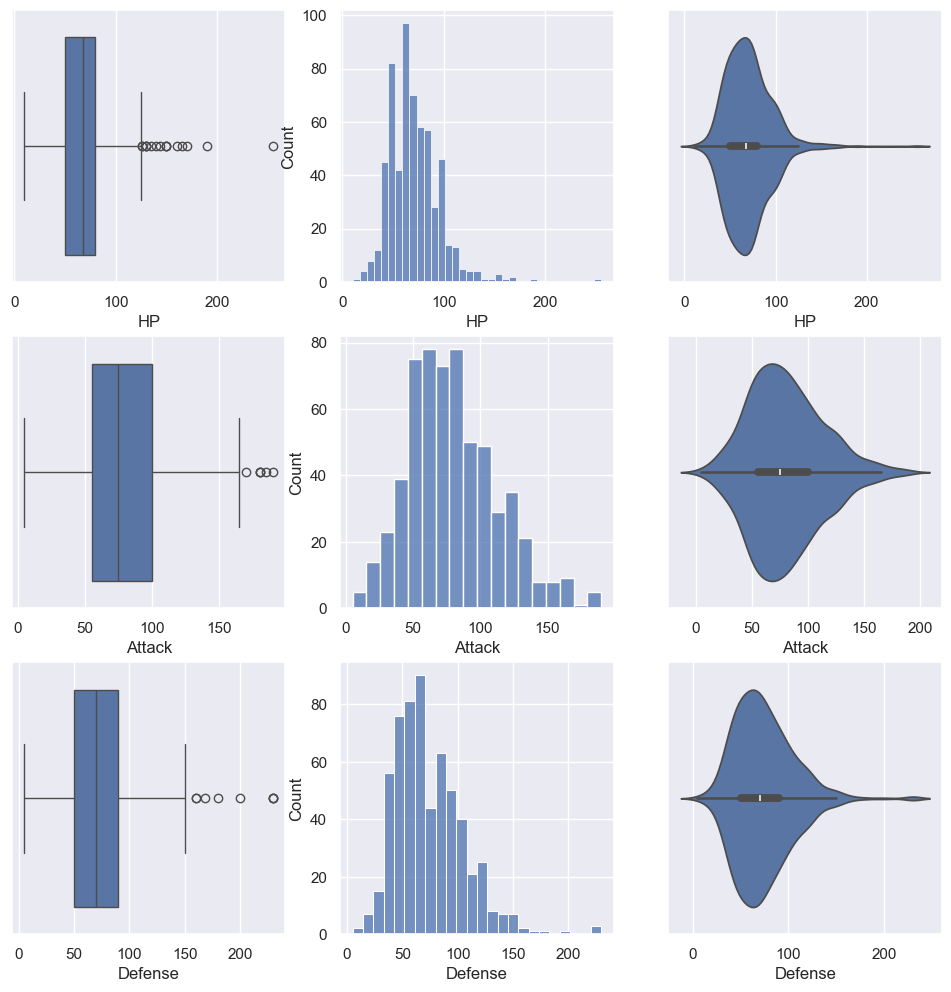

In [26]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(12, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

We check how these variables relate to `Total` and to each other

<Axes: >

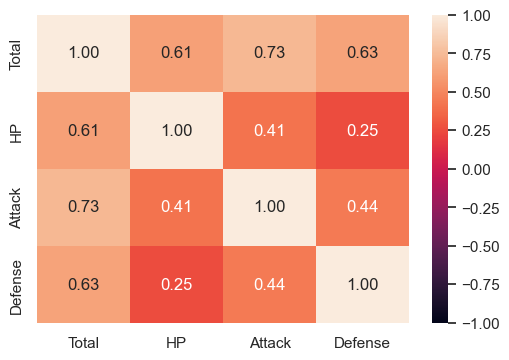

In [27]:
# Combine variables for the heatmap
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

# Plot correlation heatmap
f = plt.figure(figsize=(6, 4))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

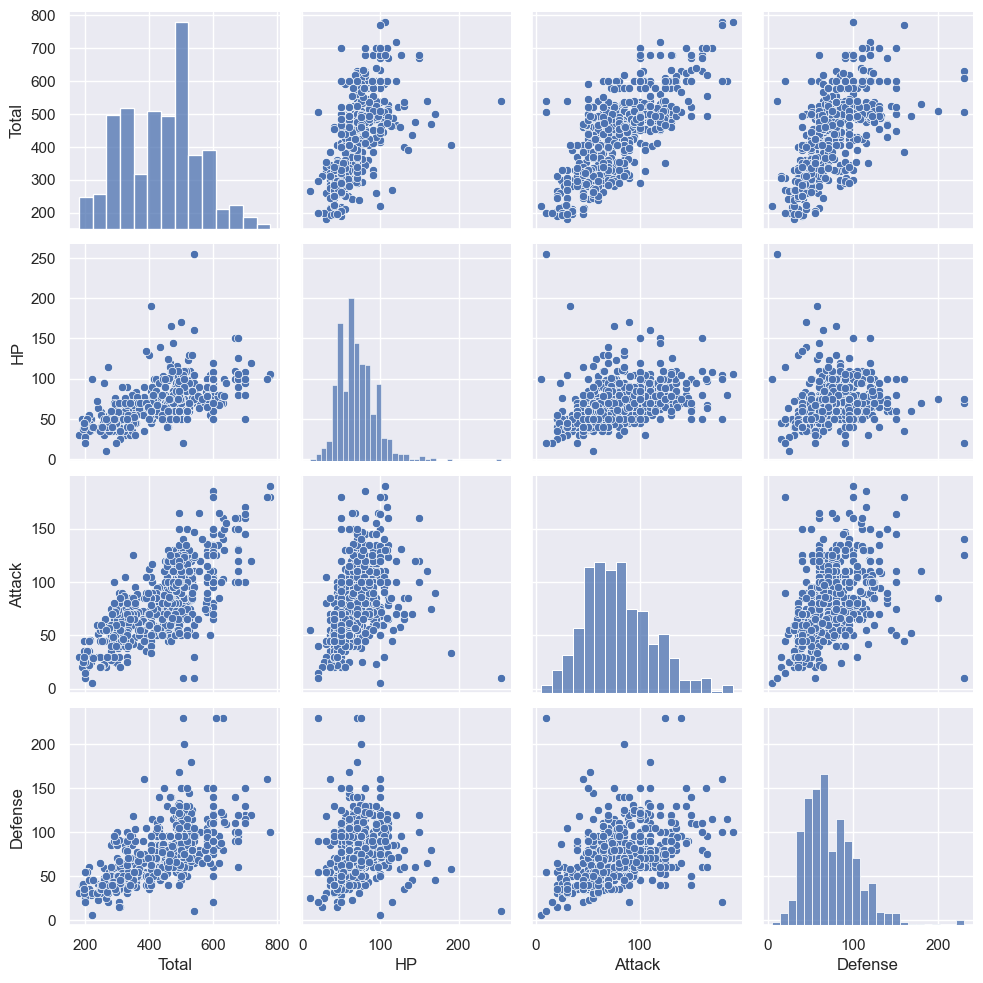

In [28]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

#### Linear Regression using Scikit-Learn

In [29]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the "weight" (coefficient) the model assigns to each Stat
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [96.17507256]
Coefficients of Regression 	: a =  [[1.62299803 1.57987124 1.34956067]]



,Predictors,Coefficients
0,HP,1.622998
1,Attack,1.579871
2,Defense,1.349561


Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

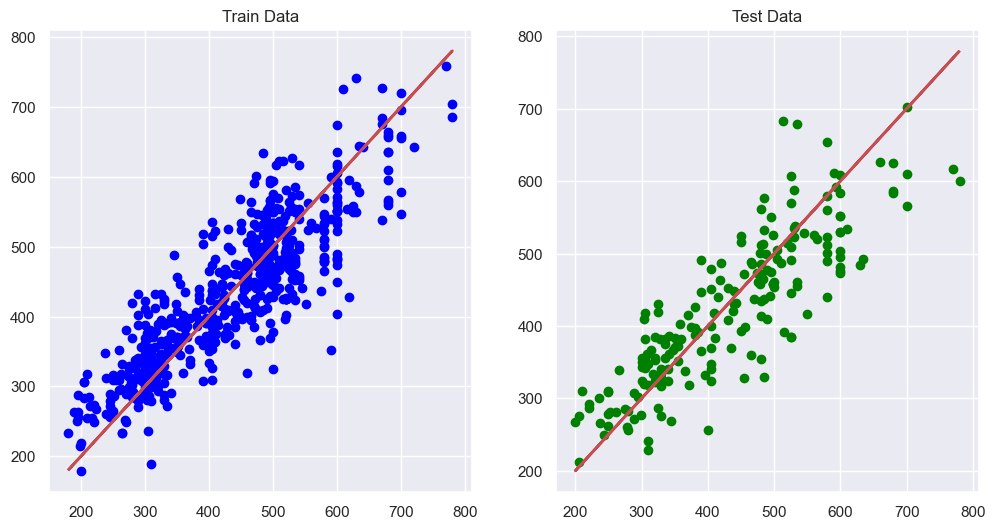

Train MSE: 3468.281543054771
Test MSE: 4139.1403281672065


In [30]:
# Predict on Train and Test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot Predicted vs True values
# Ideally, we want all points to fall on the straight line
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train Plot
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 2) # The perfect fit line (red)
axes[0].set_title("Train Data")

# Test Plot
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 2) # The perfect fit line (red)
axes[1].set_title("Test Data")
plt.show()

# Calculate Errors
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

#### Goodness of Fit of the Model

In [31]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7528343318286115
Mean Squared Error (MSE) 	: 3468.281543054771

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7310348235458302
Mean Squared Error (MSE) 	: 4139.1403281672065


---

## Multi-Variate Linear Regression

Let us set up another Multi-Variate Linear Regression problem.   

Response Variable : **Total**     
Predictor Feature : **HP, Attack, Defense, Sp. Atk, Sp. Def, Speed**       

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $a_4$ $\times$ Sp. Atk + $a_5$ $\times$ Sp. Def + $a_6$ $\times$ Speed + $b$  

Intercept of Regression 	: b =  [-5.1159077e-13]
Coefficients of Regression 	: a =  [[1. 1. 1. 1. 1. 1.]]

  Predictors  Coefficients
0         HP           1.0
1     Attack           1.0
2    Defense           1.0
3    Sp. Atk           1.0
4    Sp. Def           1.0
5      Speed           1.0


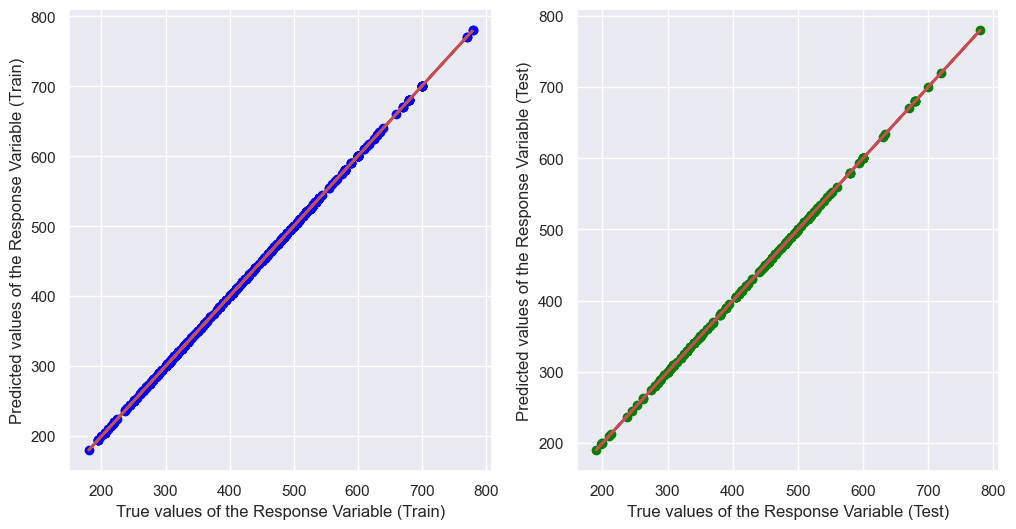


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 3.1261611040822435e-26

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 3.2929704756566576e-26


In [32]:
# We bring in the specific tools we need from the sklearn library.
from sklearn.linear_model import LinearRegression  # The model builder
from sklearn.model_selection import train_test_split # The data shuffler
from sklearn.metrics import mean_squared_error       # The error calculator

# Response (y): What we want to predict -> 'Total'
y = pd.DataFrame(pkmndata["Total"])
# Predictors (X): The input data. This time we use a list of 6 column names.
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# We randomly split the data. 75% will be used to train, 25% to test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # Initialize an empty model
linreg.fit(X_train, y_train)        # The model 'studies' the relationship between X and y

# Coefficients of the Linear Regression line
# Intercept (b): The starting value if all stats were 0.
print('Intercept of Regression \t: b = ', linreg.intercept_)    

# Coefficients (a): The 'weight' or importance given to each of the 6 stats.
# Since we know Total is the sum of these stats, we expect these to be close to 1.0
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Helper code to print the stat name next to its learned coefficient
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))

# We ask the model to predict the Total for both the study data (Train) and new data (Test)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Training Performance
# We plot the Predicted value (Y-axis) against the True value (X-axis).
axes[0].scatter(y_train, y_train_pred, color = "blue")

# We draw a perfect red diagonal line.
# If a dot falls exactly on this line, it means Prediction = True Value (Perfect Accuracy).
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

# Plot 2: Testing Performance (The real verification)
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("\nGoodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

The above plot is quite unique in Data Science as it is a ***Perfect Fit***. 

* The **Red Line** represents $y=x$. Any point lying on this line means the *Predicted Value* is exactly equal to the *True Value*. 
* The **Blue/Green Dots** are your *Pokemon*. Notice that they don't just "cluster" on the line, but are exactly on top of it. 

Usually, the real-world data is messy, and we see a "cloud" of points around the red line. However, in this specific case, the `Total` variable in Pokemon is calculated by simply summing up the 6 stats: `HP + Attack + Defense + Sp. Atk + Sp. Def + Speed`. 

Because this relationship is a deterministic mathematical sum, the Linear Regression can learn the *correct answer* perfectly. In fact, if you take a look at the coefficient output, you will see that every coefficient is **1.0** and the intercept is **0**.

### TLDR 
If the relationship is purely mathematical (like `Sum = A + B`), the Linear Regression model will find it with 100% accuracy ($R^2 = 1.0$).

---

## Prediction using a Regression Model

Once we have trained a Multi-Variate Regression Model, we may use it to predict **Total** for any particular Pokemon.   

> Regression Model : Total = $a_1$ $\times$ HP + $a_2$ $\times$ Attack + $a_3$ $\times$ Defense + $b$  

Intercept of Regression 	: b =  [97.36037106]
Coefficients of Regression 	: a =  [[1.66097389 1.5361679  1.34240097]]

  Predictors  Coefficients
0         HP      1.660974
1     Attack      1.536168
2    Defense      1.342401



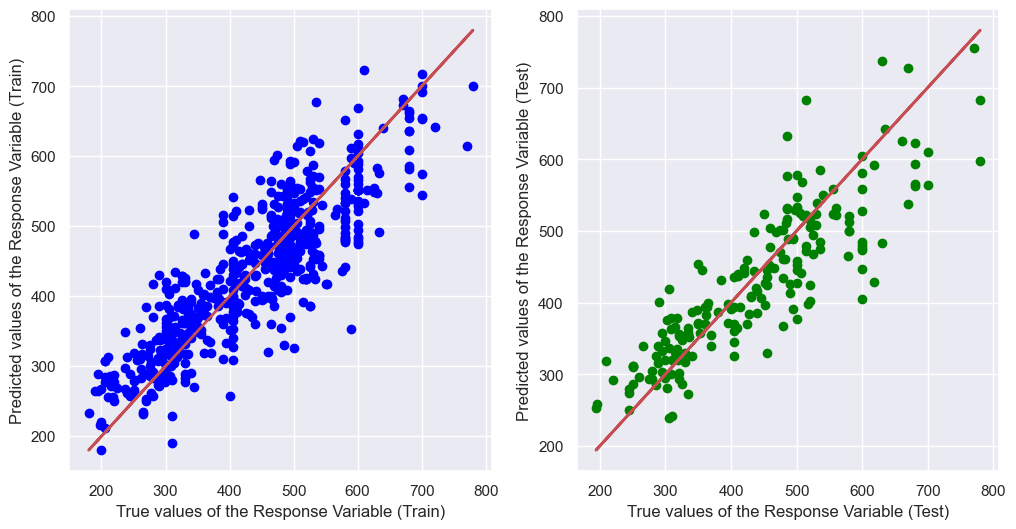

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7471413090972631
Mean Squared Error (MSE) 	: 3531.786749901236

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.745506583645074
Mean Squared Error (MSE) 	: 3961.826201844291


In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["HP", "Attack", "Defense"]

y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

#### Prediction of Total

Let's predict the value of **Total** for a few specific Pokemons -- *Charizard*, *Snorlax* and *Vivillon* -- using the Regression Model derived above.   

In [34]:
# Extract Pokemons for Prediction
pkmndata_pred = pkmndata[pkmndata["Name"].isin(["Charizard", "Snorlax", "Vivillon"])]
pkmndata_pred

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False


In [35]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(pkmndata_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[460.66171356],
       [619.35072512],
       [377.2390613 ]])

In [36]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_pred[["Name", "Total"]], y_pred], axis = 1)

y_errs = 100 * abs(pkmndata_acc["Total"] - pkmndata_acc["PredTotal"]) / pkmndata_acc["Total"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = pkmndata_pred.index)
pkmndata_acc = pd.concat([pkmndata_acc, y_errs], axis = 1)

pkmndata_acc

,Name,Total,PredTotal,Error
6,Charizard,534,460.661714,13.733762
155,Snorlax,540,619.350725,14.694579
734,Vivillon,411,377.239061,8.214340


#### Prediction Interval

The confidence on Prediction depends on the Distribution and Deviation of the Errors in Prediction.    
We obtain the Mean Squared Error on the Train Set while fitting/training the Linear Regression Model.    

The Standard Error of Prediction may be estimated as $StdE = \sqrt{\frac{n}{n-2} MSE}$ from the Train Set.

---

In Data Science, a single number prediction is rarely sufficient. We need to know: *How confident are we?* or *What is the margin of error?* 

This is a **Prediction Interval**. It's the difference between saying "I think the shuttle bus comes at 8:15" vs. "I am 95% sure the shuttle bus comes between 8:10 and 8:20". 

**Calculating the Standard Error (The "Average Mistake")**

First, we need to quantify how much our model typically "missses" by. We start with the **Mean Squared Error (MSE)** we calculated earlier and convert it into a **Standard Error (StdE)**.

$$\mathrm{StdE} = \sqrt{\frac{n}{n-2} MSE}$$

* *n*: The number of samples we trained on
* *n-2*: A statistical adjustment used because we estimated two things (intercept $b$ and slope $a$)

In [37]:
# Calculate the Mean Squared Error on the training data
MSE_train = mean_squared_error(y_train, y_train_pred)

# Calculate Standard Error (StdE)
# We adjust the MSE by the sample size (n) to get an unbiased estimate of error
n = len(y_train)
StdE_pred = np.sqrt(n * MSE_train / (n - 2))

# Print the results formatted to 2 decimal places
print(f"Mean Squared Error (MSE): {MSE_train:.2f}")
print(f"Pred Standard Error (SE): {StdE_pred:.2f}")

Mean Squared Error (MSE): 3531.79
Pred Standard Error (SE): 59.53


In Prediction, we assume a Gaussian (Normal) Distribution for Predictions Errors. **Think a Bell Curve**.

The `95%` Prediction Interval for any data point is given by $Prediction \pm 1.96 \times StdE$    
The `99%` Prediction Interval for any data point is given by $Prediction \pm 2.58 \times StdE$

In [38]:
# %%
# --- 95% Confidence Interval (1.96 * SE) ---
# Calculate the Lower Limit (Prediction - Margin)
y_95l = pd.DataFrame(pkmndata_acc["PredTotal"] - 1.96 * StdE_pred)
y_95l = y_95l.rename(columns = {"PredTotal" : "95 Lower"}) # Rename column for clarity

# Calculate the Upper Limit (Prediction + Margin)
y_95u = pd.DataFrame(pkmndata_acc["PredTotal"] + 1.96 * StdE_pred)
y_95u = y_95u.rename(columns = {"PredTotal" : "95 Upper"})

# --- 99% Confidence Interval (2.58 * SE) ---
# Calculate the Lower Limit (Strict)
y_99l = pd.DataFrame(pkmndata_acc["PredTotal"] - 2.58 * StdE_pred)
y_99l = y_99l.rename(columns = {"PredTotal" : "99 Lower"})

# Calculate the Upper Limit (Strict)
y_99u = pd.DataFrame(pkmndata_acc["PredTotal"] + 2.58 * StdE_pred)
y_99u = y_99u.rename(columns = {"PredTotal" : "99 Upper"})

# --- Combine into one Table ---
# pd.concat concatenates (combines) the columns together side-by-side (axis=1)
pkmndata_int = pd.concat([pkmndata_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)

# Display the final table with predictions and intervals
pkmndata_int

,Name,Total,PredTotal,Error,95 Lower,95 Upper,99 Lower,99 Upper
6,Charizard,534,460.661714,13.733762,343.986571,577.336856,307.079128,614.244299
155,Snorlax,540,619.350725,14.694579,502.675582,736.025868,465.768139,772.933311
734,Vivillon,411,377.239061,8.214340,260.563919,493.914204,223.656475,530.821647


**What to look for in** `pkmndata_int`:

* **PredTotal**: The exact number the model guessed
* **95 Lower/Upper**: The range where the model is 95% sure the *real* value lies

**Observation**: Note that the 99% interval is *wider* than the 95% interval. To be more certain, you have to allow for a wider range of possibilites. 

### Summary: Linear Regression with Pokemon Data

**1. The Machine Learning Workflow**

In this lesson, we followed the standard Data Science pipeline to predict a Pokemon's strength.

* **Exploration**: We used **Boxplots** and **Jointplots** to spot relationships (Correlations). If the data doesn't look related visually, the mode won't learn well.
* **Split**: We divided data into **Train** (LAMS) and **Test** (Finals)
* **Train**: We fed the Train data into the model so it could calculate the "Line of Best Fit".
* **Predict**: We tested the model on the Test data to see how well it generalized.


**2. Univariate vs. Multivariate**

We attempted two types of regression to predict the **Total** strength (response variable)

* **Univariate (One-to-One)**:
    * *Input*: HP
    * *Result*: Poor performance. A Pokemon's strength relies on more than just health.
    * *Visual*: A line drawn through a scattered cloud of dots. 

* **Multivariate (Many-to-One)**:
    * *Input*: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
    * *Result*: **Perfect Prediction** $(R^2 = 1.0)$
    * *Why?*: Because `Total` is mathematically defined as the sum of the 6 stats. Linear Regression is excellent at finding simple mathematical relationships like sums.


**3. How to Grade the Model (Metrics)**

We used two scores to judge our model's performance

| Metric | Name | Analogy | Goal |
| --- | --- | --- | --- |
| $R^2$ | Explained Variance | Exam Score (0 to 1) | Closer to 1.0 is better |
| **MSE** | Mean Squared Error | Penalty Points | Closer to 0.0 is better |


**4. Understanding Uncertainity (Prediction Intervals)**

A single prediction (e.g., "Total=525") is rarely enough. We need to know *how confident* we are. We assume errors follow a **Normal Distribution** (Bell Curve). 

* *Standard Error (StdE)*: The average distance the model "misses by"
* *95% Confidence Interval*: We cast a "net" of width $1.96 \times$ **Error**. We are 95% sure the true value is in this range
* *99% Confidence Interval*: We cast a wider "net" of width $2.58 \times$ **Error**
* *Rule of Thumb*: To be more certain (99%), you must accept a wider range of possibilities. 


**5. Python Cheatsheet**

Assuming that $x$ is our **input data**, and $y$ is our **output data**. For instance, based on the student's quiz scores *(input, x)*, what would their grade be *(output, y)*. 

| Step | Code | Description | 
| --- | --- | --- |
| **1a. Load Data** | `pd.read_csv('filepath')` | Import data into a DataFrame |
| **1b. Isolate Variables** | `x = df['input_colname']`<br>`y = df['output_colname']` | Isolate the columns/variables we will use. |
| **2. Split** | `train_test_split(x,y,test_size)` | Randomly shuffles and separates data into train/test splits.<br>*test_size* is either ratio or how many samples you want for the test set| 
| **3. Initialize** | `model = LinearRegression()` | Creates an empty, **untrained** model | 
| **4. Train** | `model.fit(X_train, Y_train)` | The model learns the math $y = \alpha \times x + \beta$ |
| **5. Check Coefficients** | `coeff = model.coef_`<br>`intercept = model.intercept_` | Printing out the intercept (y-intercept)<br>and coefficients (gradient) of the linear regression model |
| **6. Predict** | `model.predict(X_test)` | The model guesses values for the input data (usally test set)| 
| **7. Check Fit** | `model.score(x,y)` | Returns the $R^2$ value, or how well the model fits the data | 